In [ ]:
!pip3 install seaborn

In [167]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [198]:
data = pd.read_csv('/Users/kotpr/Downloads/diabetes_formatted.txt', encoding='utf-8', sep="\t")

In [199]:
y = data['Диагноз']
del data['Диагноз']
X = data

<Axes: >

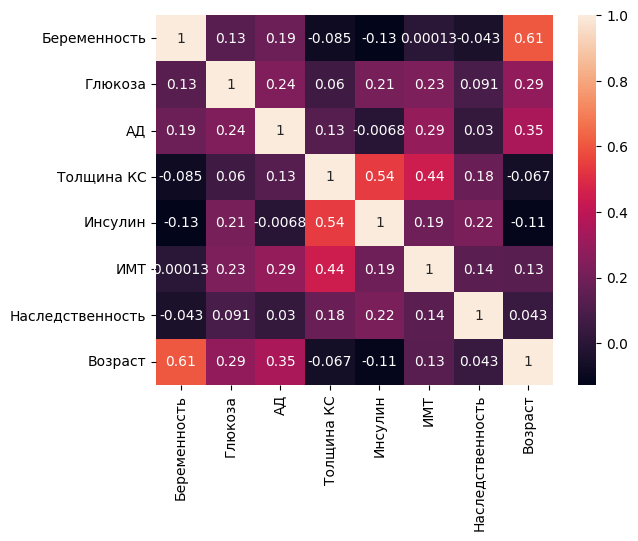

In [200]:
sns.heatmap(data.corr(method="spearman"), annot=True)

In [201]:
del data['Толщина КС'], data['АД']
# del data['Толщина КС'], data['Беременность']

In [202]:
norm = MinMaxScaler().fit(X)
X = norm.transform(X)

In [203]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [237]:
class MyLogisticRegression:
    def __init__(self):
        self.w, self.b, self.i = 0, 0, 0

    def fit(self, x_train, y_train, learning_rate=0.01, lambda_=0.01):
        n = x_train.shape[1]
        
        self.w = np.random.uniform(-1, 1, n)
        self.b = np.random.uniform(-1, 1, 1)[0]

        x = x_train#.to_numpy()
        y = y_train.to_numpy()

        last_w = 0
        self.i = 0

        while True:
            self.i += 1
            for i in range(len(x)):
                a = sigmoid(self.w.dot(x[i]) + self.b)
                dw = learning_rate * (a - y[i]) * x[i]
                db = learning_rate * (a - y[i])

                self.w = self.w - dw# + 2 * lambda_ * self.w
                self.b = self.b - db

            if np.linalg.norm(last_w - self.w) < 1e-3:
                break
            else: 
                last_w = self.w
            
                    

    def predict(self, x_test):
        x = x_test#.to_numpy()
        list_ = []
        for i in range(len(x)):
            list_.append(0 if (self.w.dot(x[i]) + self.b) < 0.5 else 1)
        return np.array(list_)

In [238]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [239]:
lg = MyLogisticRegression()
lg.fit(x_train, y_train, 0.001)
result = lg.predict(x_test)

In [240]:
print(accuracy_score(y_test, result))

0.8051948051948052


In [241]:
print(lg.i)

2579


In [218]:
print(lg.w, 'coef')
print(lg.b, 'bias')

[ 0.87116785  0.73354597  0.25453718 -0.11189329 -0.22327182  0.29872481] coef
-1.1206335488062302 bias


In [23]:
from sklearn.model_selection import train_test_split

In [37]:
np.random.uniform(-1, 1, 5)

array([-0.69648826,  0.11964908,  0.96930429,  0.46758811, -0.81599574])